# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [144]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames
from matplotlib import pyplot as plt
from matplotlib import gridspec
import seaborn as sns


# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [145]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [146]:
# Check for null values
print data.isnull().values.any()

False


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [147]:
random_state = 1

# TODO: Select three indices of your choice you wish to sample from the dataset

# Some random selection to kick us off
# np.random.seed(random_state)
# indices = np.random.randint(0, data.shape[0]-1, size=3)
# print indices

# manually tuned
indices = [35, 235, 110]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,688,5491,11091,833,4239,436
1,1838,6380,2824,1218,1216,295
2,11818,1648,1694,2276,169,1647


It will be easier to look at this with some plots

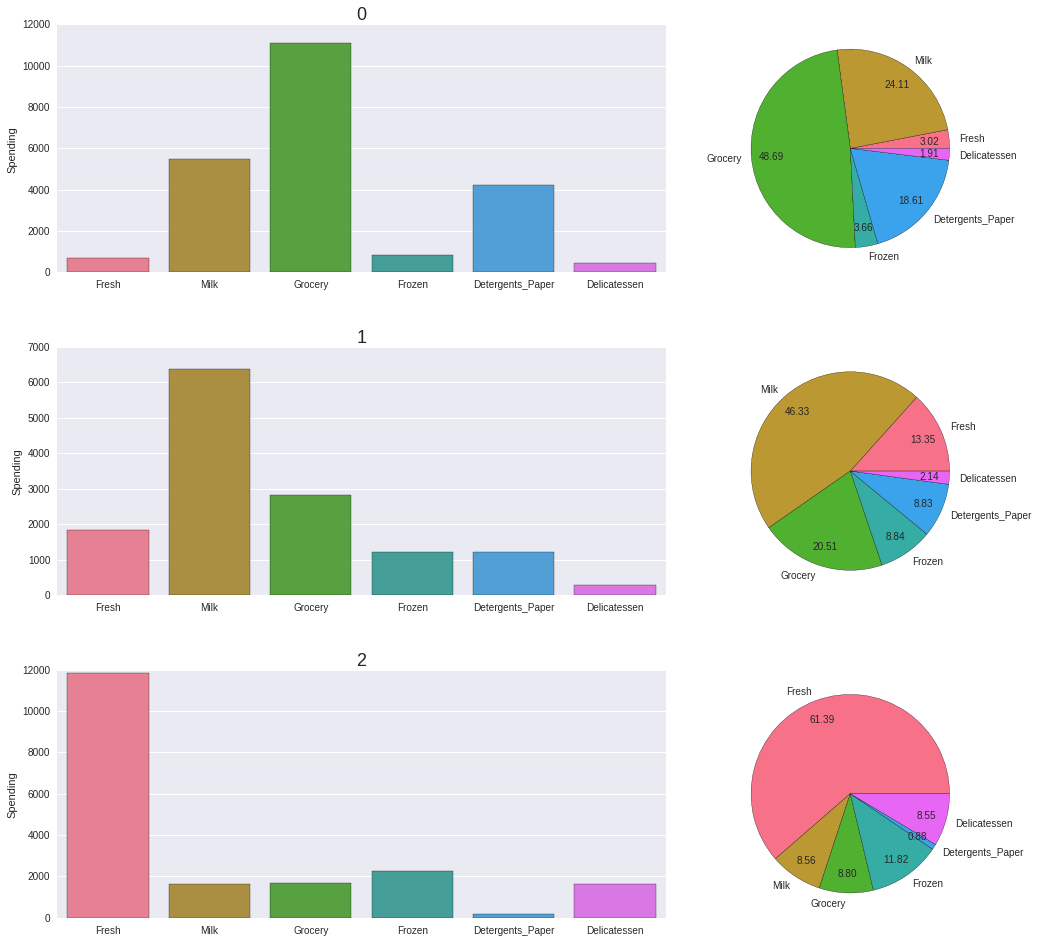

In [148]:
# Draw some charts to visualize
def visualize_samples(samples):
    current_palette = sns.color_palette("husl", samples.shape[1])
    plt.figure(figsize=(16, 14))
    gs = gridspec.GridSpec(3, 2, width_ratios=[2, 1.5])
    for i in range(samples.shape[0]):
        barplt = plt.subplot(gs[i*2])
        sns.barplot(x=samples.columns.values, y=samples.iloc[i], ax=barplt, palette=current_palette)
        barplt.set(ylabel='Spending')
        barplt.set_title(samples.index[i], fontsize=18)
        pieplt = plt.subplot(gs[i*2+1], aspect=1)
        pieplt.pie(samples.iloc[i], labels=samples.columns, colors=current_palette, autopct='%.2f', pctdistance=0.8)
        plt.tight_layout(pad=4)

visualize_samples(samples)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

**Customer 0** is selling mostly non-perishable groceries and to a lesser extent some milk and household goods. This customer looks like a retailer, possibly a mini-mart. 

**Customer 1** is buying a lot of milk, which suggests a cafe.

**Customer 2** is using a lot of fresh produce among other things and is most likely a restaurant.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [149]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.cross_validation import train_test_split
from sklearn import tree

X_all = data.drop("Detergents_Paper", axis=1)
y_all = data["Detergents_Paper"]

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size=0.8, test_size=0.2, random_state=random_state)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = tree.DecisionTreeRegressor(max_depth=4)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print "R^2 Score: {:.4f}\n".format(score)
print "Feature Importances:"
for f, i in zip(X_train.columns, regressor.feature_importances_):
    print "  {}: {:.4f}".format(f, i)

R^2 Score: 0.8275

Feature Importances:
  Fresh: 0.0190
  Milk: 0.0265
  Grocery: 0.9354
  Frozen: 0.0037
  Delicatessen: 0.0154


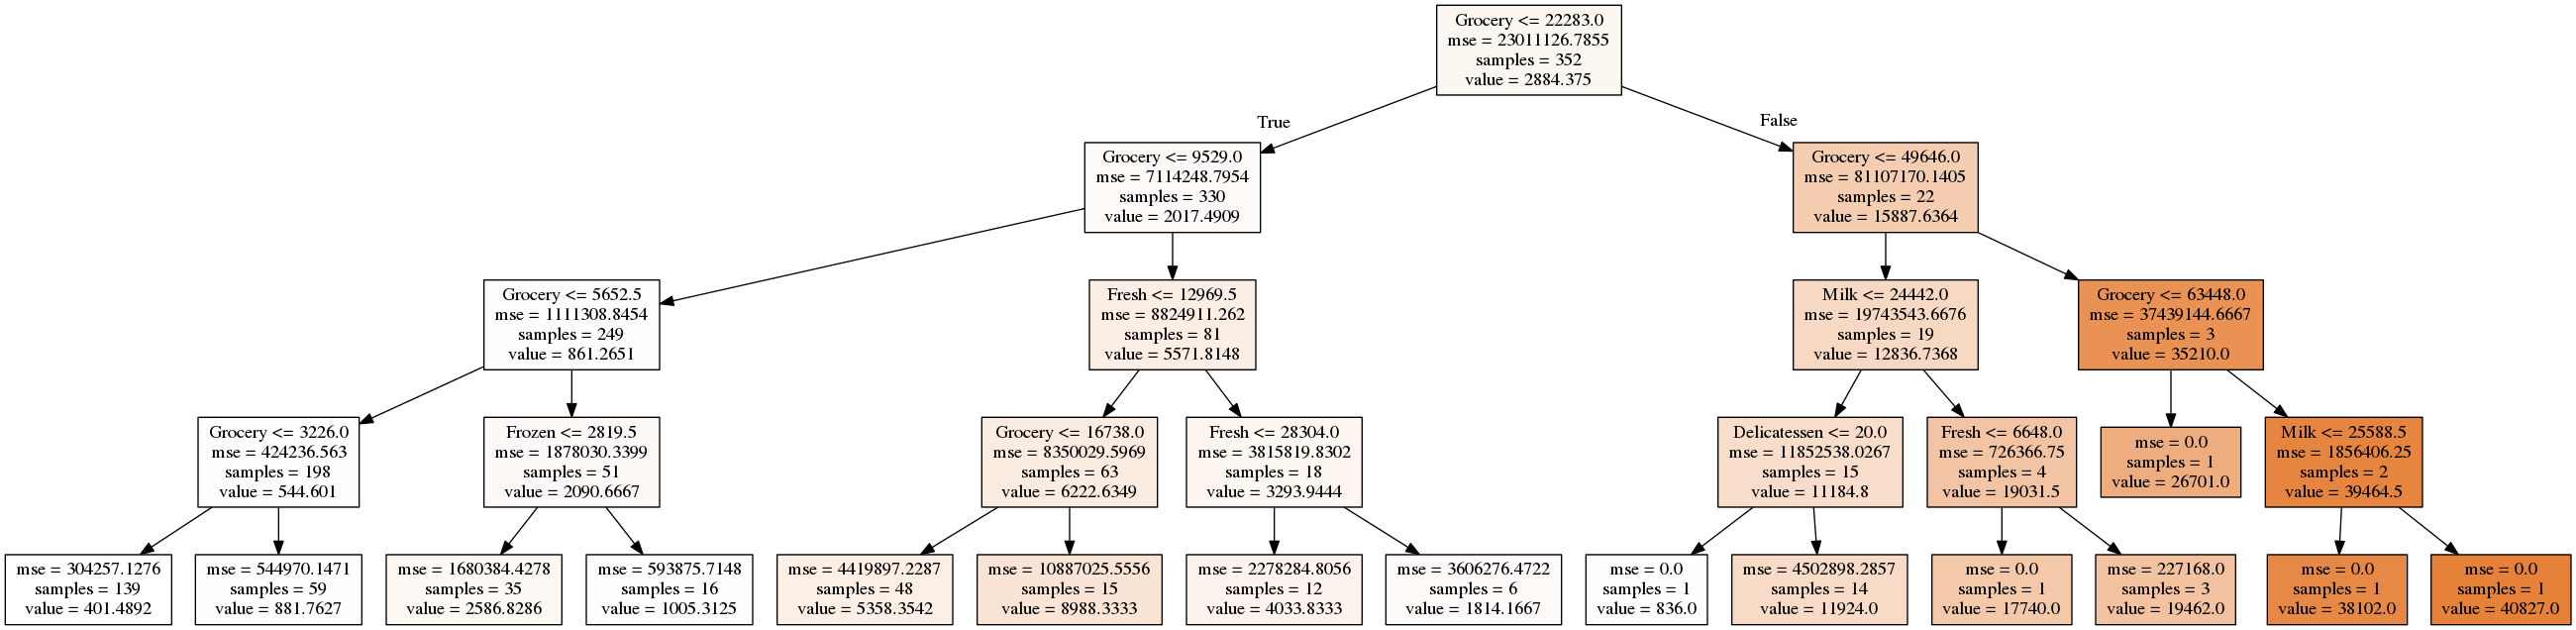

In [150]:
import pydot 
from StringIO import StringIO
from IPython.display import Image  
dot_data = StringIO()  
tree.export_graphviz(regressor, out_file=dot_data, feature_names=X_train.columns, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

**Detergents_Paper** was the chosen feature to predict. The score was 0.8275. It is significant enough to suggest that our target feature has some dependency. Of note is the gini importance of **Groceries**: 0.9212, indicating that it is highly predictive of the consumption of **Detergents_Paper**. We can see this clearly in the decision tree where the **Grocery** feature is used to split the data points several times.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

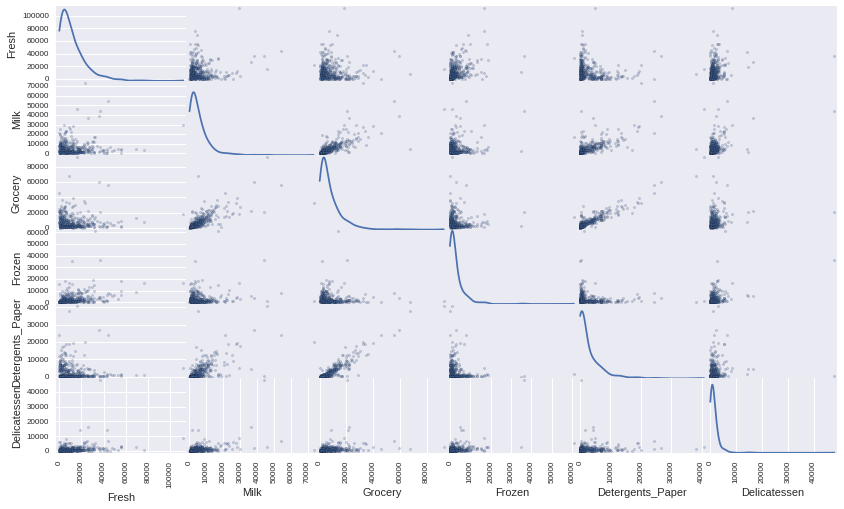

In [151]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

There is indeed a semblance of a positive correlation between **Groceries** and **Detergents_Paper**. Based on the scatterplot, there is a near linear relationship between them. These two features also seem to have some correlation with **Milk**, but to a lesser extent. It's not easy to tell since the data is skewed to the left due to the presence of some high-volume outliers.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

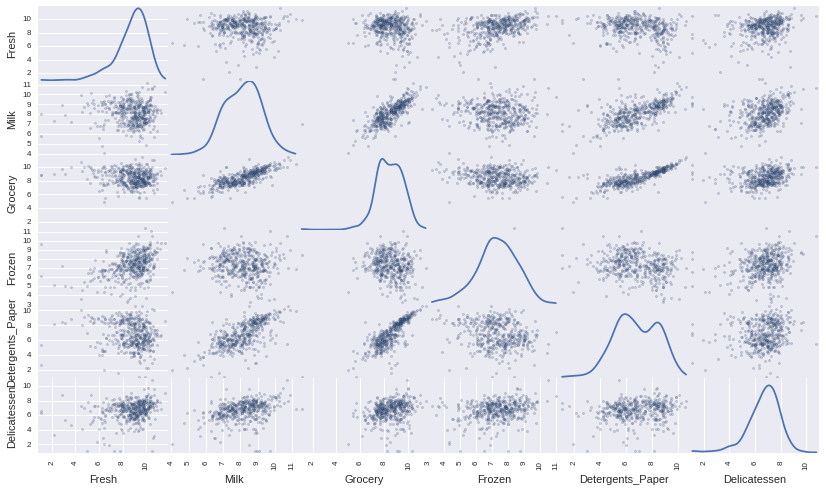

In [152]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6.533789,8.610866,9.313889,6.725034,8.352083,6.077642
1,7.516433,8.760923,7.945910,7.104965,7.103322,5.686975
2,9.377379,7.407318,7.434848,7.730175,5.129899,7.406711


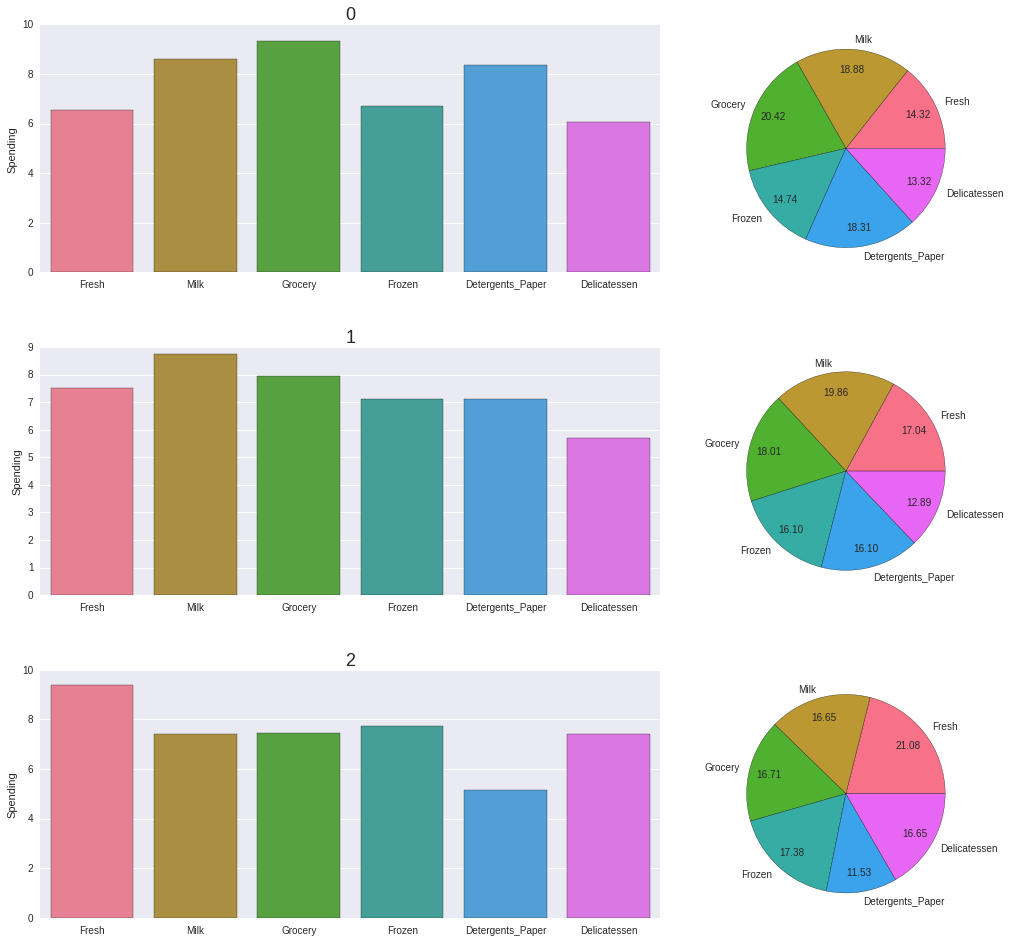

In [153]:
# Display the log-transformed sample data
display(log_samples)
visualize_samples(log_samples)

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [154]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data, 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data, 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = Q3-Q1
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(outliers)
#     print outliers.index.values
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
39,10.935942,6.318968,6.804615,9.210540,5.356586,7.977968
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
103,10.934570,8.161660,9.094480,9.799681,7.299797,7.823246
125,11.241602,8.152774,8.868132,9.713416,6.656727,6.822197
181,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
258,10.934588,8.425736,7.661056,8.767485,6.593045,8.108021


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
47,10.702480,10.901524,10.925417,8.959569,10.092909,8.774158
61,10.489662,10.555005,10.995377,8.087640,10.192456,7.609367
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
85,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
333,9.055439,8.513185,11.116886,4.875197,10.548022,7.102499


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
60,9.058354,8.021256,8.968778,4.564348,8.317522,5.416100
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
221,8.593413,8.923058,9.272940,4.510860,8.334952,5.476464
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
27,9.566335,6.688355,8.021256,6.184149,4.605170,6.249975
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
90,9.341807,6.390241,7.401231,8.115820,4.234107,5.886104
93,9.333796,8.035926,7.631432,10.463360,4.262680,7.900266
97,5.998937,5.537334,6.413459,6.651572,3.988984,4.143135
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
122,9.410174,5.303305,5.501258,7.596392,3.218876,6.756932
131,7.650169,6.378426,5.749393,5.846439,4.248495,5.736572
134,8.907612,7.540090,7.684324,6.579251,3.850148,6.285998
141,10.321507,9.491904,8.554296,5.771441,3.931826,7.279319


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
25,9.690604,8.349957,8.935245,5.303305,8.294799,4.043051
42,9.291920,8.929965,9.613202,5.236442,8.839132,3.828641
43,6.445720,9.314250,10.085726,6.668228,9.162095,4.276666
44,9.176784,8.857515,9.256365,6.293419,8.437717,4.174387
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
88,8.970051,6.295266,8.304495,9.183483,5.105945,3.828641
97,5.998937,5.537334,6.413459,6.651572,3.988984,4.143135
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

There are some data points that were marked as outliers in two features at most. It wouldn't be prudent to remove any of these data points as they are valid values and not the result of some error. It is reasonable to expect in general that customers will have fewer/more purchases in some product categories than others. If there was a data point that was marked as an outlier in every category then it might be suspicious and will warrant further investigation. In this case, we would like to keep all the data points.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

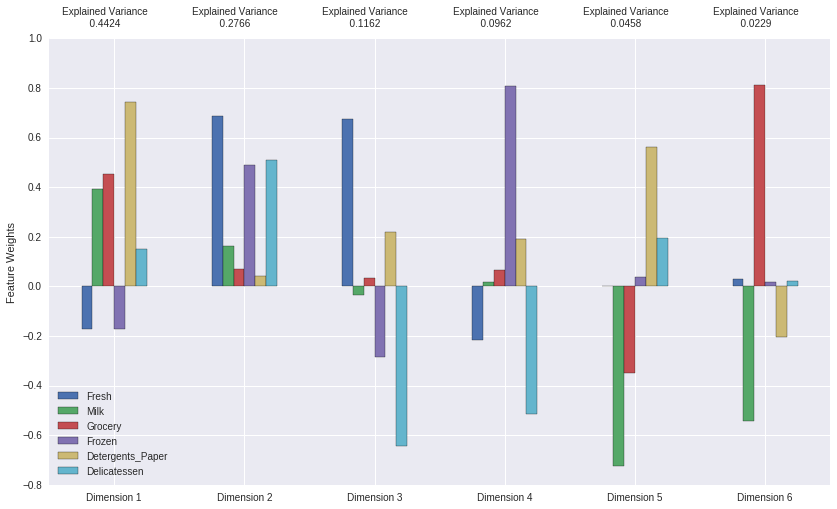

In [155]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=data.shape[1])
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

Cumulative sum of explained variances:  [ 0.44237417  0.71894523  0.83511865  0.93129585  0.97705265  1.        ]


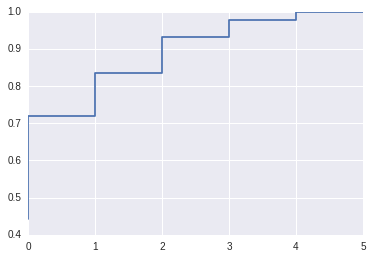

In [156]:
evr = pd.Series(pca.explained_variance_ratio_).cumsum()
_ = evr.plot(drawstyle="steps")
print "Cumulative sum of explained variances: ", evr.values

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

The first two(2) components account for **71.8945%** and the first four(4) account for **93.1296%**. 

When we do PCA, we are assuming that a feature with greater variance contains more information. Each component returned by PCA is a linear combination of our original features. These resulting components are ranked in terms of their explained variance. It is helpful to think of these as **Signals and Noise**, wherein the the first principal component is the main signal with the greatest amplitude. Each following component (decreasing in amplitude) is added to the main signal, making the signal 'noisier' but containing more information.

PCA tells us some important things in this case. Based on the first component, it is easiest to tell customers apart by looking at how much a customer buys **Detergents_Paper, Groceries and Milk**. This is followed by the 2nd component: **Fresh, Frozen and Delicatessen**. We recall that this already accounts for **~72%** of the variance.

The next two components distinguishes customers by the amount of **Fresh** and **Frozen** products they buy and how much they *don't* buy **Delicatessen**. These 4 components are enough for us to tell apart **93%** of customers.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

,0,1,2,3,4,5
0,2.1504,-1.8799,-0.5830,0.6709,0.0878,0.0395
1,0.3625,-1.3433,-0.0991,0.6444,-0.3102,-0.8761
2,-2.0488,0.7751,-0.5347,-0.5667,0.0932,-0.0529


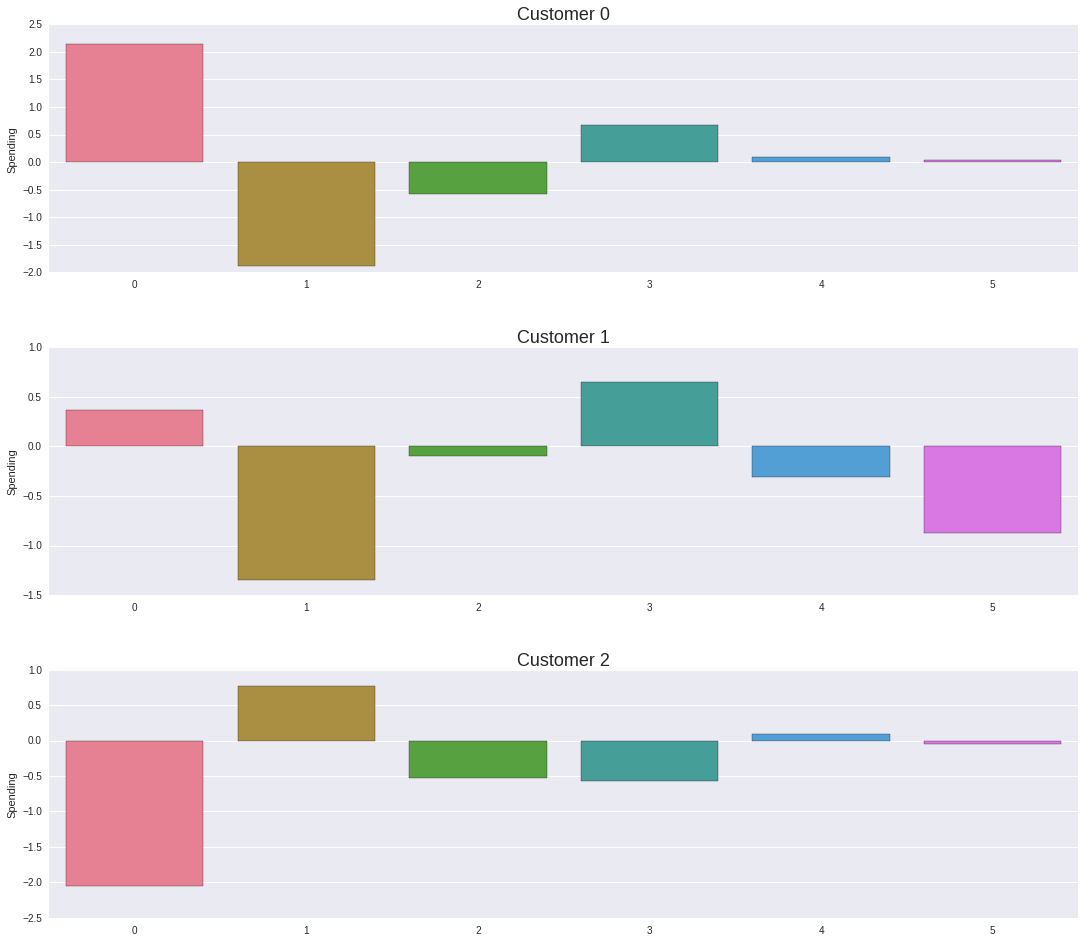

In [157]:
# Display sample log-data after having a PCA transformation applied
pca_samples_df = pd.DataFrame(np.round(pca_samples, 4))
display(pca_samples_df, columns = pca_results.index.values)

current_palette = sns.color_palette("husl", samples.shape[1])
plt.figure(figsize=(16, 14))
gs = gridspec.GridSpec(3, 1)
for i in range(pca_samples_df.shape[0]):
    barplt = plt.subplot(gs[i])
    sns.barplot(x=pca_samples_df.columns.values, y=pca_samples_df.iloc[i], ax=barplt, palette=current_palette)
    barplt.set(ylabel='Spending')
    barplt.set_title("Customer {}".format(i), fontsize=18)
    plt.tight_layout(pad=4)

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [158]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca2= PCA(n_components=2)
pca2.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca2.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca2.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [159]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.1504,-1.8799
1,0.3625,-1.3433
2,-2.0488,0.7751


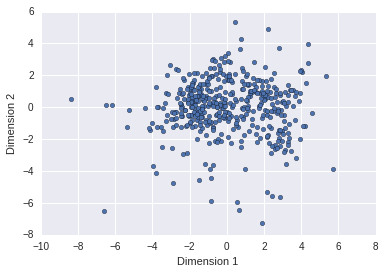

In [160]:
_ = reduced_data.plot.scatter("Dimension 1", "Dimension 2")

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

The Gaussian Mixture Model (GMM) is a generalization of K-Means. K-Means produces 'hard' clusters, wherein each data point is assigned a cluster with certainty. In contrast, GMM produces 'soft' clusters, wherein each data point is assigned a probability of belonging to a cluster. This is useful if classifications are not clear cut and there is something we can do about data points that are 'in the gray'. Of course, the tradeoff of this extra power is speed, and K-Means is a much simpler algorithm than Expectation Maximization (EM).

Looking at the scatter plot of the PCA-transformed data, there are no clear gaps to tell the possible clusters apart. Moreover, at only 440 data points, performance won't be an issue so we can use GMM without reservation.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [161]:
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score
from sklearn.grid_search import RandomizedSearchCV, GridSearchCV

def silhouette_scorer(estimator, X, y=None):
    yh = estimator.predict(X)
    return silhouette_score(X, yh)

params = {
    'n_components': range(2, 8),
    'covariance_type': ['spherical', 'tied', 'diag', 'full'],
}

# TODO: Apply your clustering algorithm of choice to the reduced data
clusterer = GMM(n_components=n_clusters, random_state=random_state)

# Use gridsearch to find optimum
search = GridSearchCV(clusterer, params, scoring=silhouette_scorer)
search.fit(reduced_data)
print "Best Parameters:", search.best_params_
print "Best Silhouette Score:", search.best_score_
print "Full Report:"
for score in search.grid_scores_:
    print "\t", score
clusterer = search.best_estimator_

# Predict reduced_data
preds = clusterer.predict(reduced_data)

# Get the cluster centers
centers = clusterer.means_

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

Best Parameters: {'covariance_type': 'tied', 'n_components': 2}
Best Silhouette Score: 0.404548014162
Full Report:
	mean: 0.35539, std: 0.07048, params: {'covariance_type': 'spherical', 'n_components': 2}
	mean: 0.37774, std: 0.02241, params: {'covariance_type': 'spherical', 'n_components': 3}
	mean: 0.31964, std: 0.02184, params: {'covariance_type': 'spherical', 'n_components': 4}
	mean: 0.25572, std: 0.04495, params: {'covariance_type': 'spherical', 'n_components': 5}
	mean: 0.27648, std: 0.02045, params: {'covariance_type': 'spherical', 'n_components': 6}
	mean: 0.33448, std: 0.01825, params: {'covariance_type': 'spherical', 'n_components': 7}
	mean: 0.40455, std: 0.03260, params: {'covariance_type': 'tied', 'n_components': 2}
	mean: 0.33538, std: 0.06726, params: {'covariance_type': 'tied', 'n_components': 3}
	mean: 0.31311, std: 0.01471, params: {'covariance_type': 'tied', 'n_components': 4}
	mean: 0.30372, std: 0.03477, params: {'covariance_type': 'tied', 'n_components': 5}
	mean

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

The best score is **0.34852** at 3 clusters.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

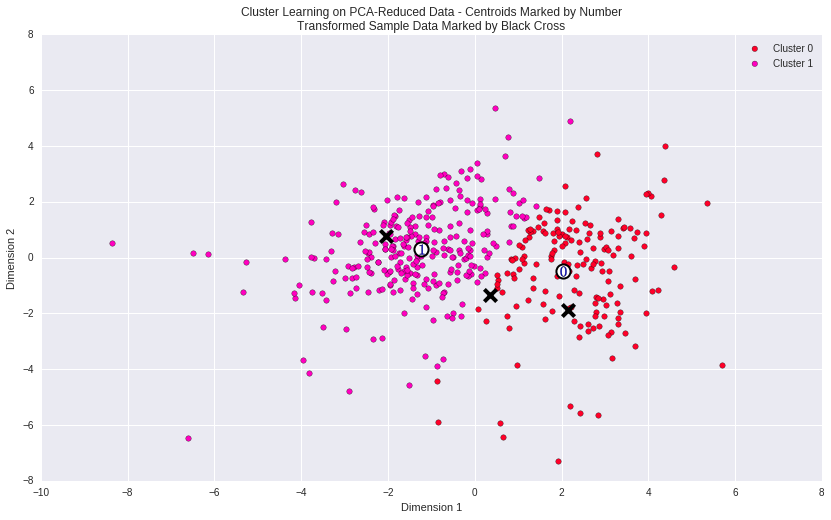

In [162]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3120.0,6968.0,11344.0,824.0,3982.0,833.0
Segment 1,9396.0,2159.0,2685.0,2120.0,354.0,756.0


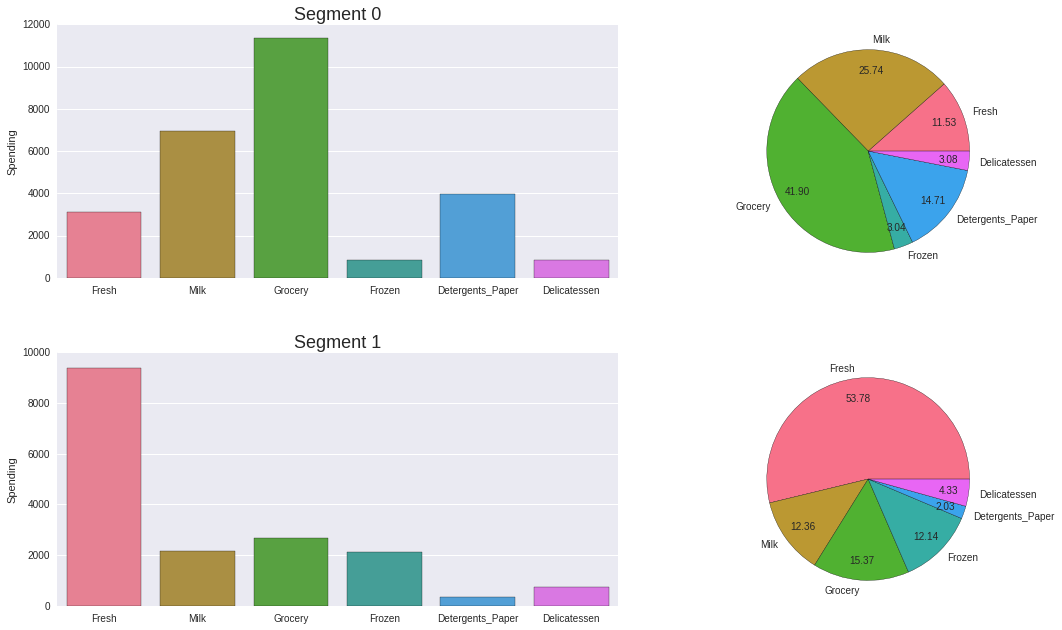

In [163]:
# TODO: Inverse transform the centers
log_centers = pca2.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

visualize_samples(true_centers)

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

Segment 0 looks like a **Retailer** purchasing good amounts of Fresh, Milk and Groceries.

Segment 1 looks like a **Restaurant** using a lot of Fresh products in food preparation.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [164]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**

For sample points 0 and 1, there are variations on the amount of Fresh, Milk and Groceries but the purchasing behaviour is certainly close enough. Sample point 2 focuses on Fresh products an can be said to be in Segment 1 for certain.

## Conclusion

### Question 10
Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether that change affects its customers positively or negatively. The wholesale distributor wants to consider changing its delivery service from 5 days a week to 3 days a week, but will only do so if it affects their customers positively. *How would you use the customer segments you found above to perform an A/B Test for this change?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

The way to do this would be to perform the A/B test on each segment. That is, each segment should have a separate control and treatment group. That way we can measure the effect of the change on each segment.

### Question 11
Additional structure is derived from originally unlabelled data when using clustering techniques. Since each customer has a segment it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and has made estimates for each customer's annual spending of the six product categories. Knowing these estimates, the wholesale distributor wants to classify each new customer to one of the customer segments to determine the most appropriate delivery service.  
*Describe a supervised learning strategy you could use to make classification predictions for the ten new customers.*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**
The simplest way to do this would be to take the Euclidean distance of the new data points to the centers of each of the identified clusters. The nearest center would be the segment the new customer. This assumes of course that we retain the segments without considering the 10 new data points.

The longer way is to use 'customer segment' as our output label and use this to train a supervised classification model. Similar to the first method, we can add the euclidean distance to each cluster center as an input feature.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

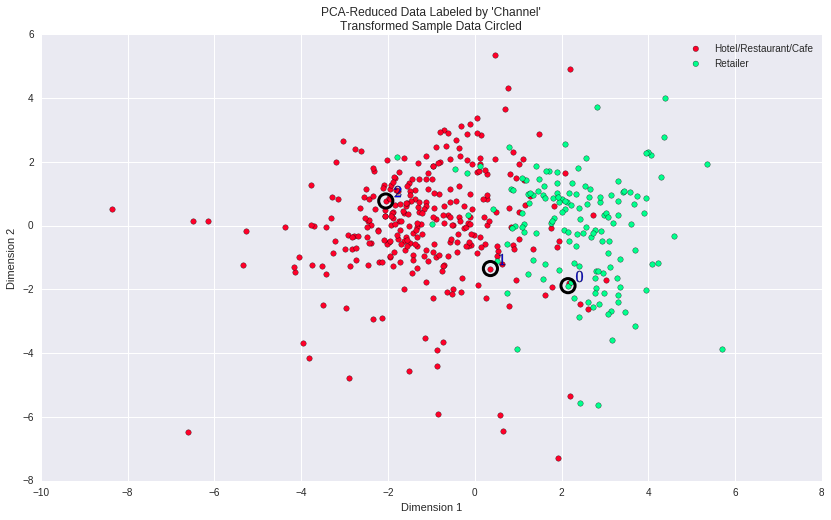

In [165]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The clustering algorithm has identified segments are somewhat consistent with the revealed labels. It has at least identified two clusters that line up the Horeca and Retail regions. However, it has misclassfied Sample Point 1 as well as several other points as a Retailer. This is to be expected as the two clusters overlap and there is uncertainty in the center region. But as we go further left the more certain we are that a data point is 'Horeca', and further right 'Retailer'.

I had initially expected that there would be more than 2 segments based on the samples. If it was not suggested to use a natural log and PCA to transform the data, my first intuition was to express each feature as a percentage of total sales for each customer. I thought that would have been more representative of customer purchasing behavior.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.